### Problem Set #2
#### MACS 30150, Dr. Evans
#### Due Monday, Jan. 21 at 11:30am
#### Haowen Shang

#### 1. ACME: Numerical Differentiation lab.

In [1]:
import sympy as sy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from autograd import grad
from autograd import numpy as anp
import math
import time
import warnings

#### Problem 1

In [2]:
#define the function
x = sy.symbols('x')
sin = sy.sin
cos = sy.cos

def y(x):
    y = (sin(x)+1)**sin(cos(x))
    return y

print("The function is: f(x) = {}".format(y(x)))

The function is: f(x) = (sin(x) + 1)**sin(cos(x))


In [3]:
#take the function's symbolic derivative with respect to x
yprime = sy.diff(y(x),x)
print("The symbolic derivative of the function with respect to x is: ")
print(yprime)

The symbolic derivative of the function with respect to x is: 
(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))


In [4]:
#Lambdify the resulting function
x_vec = np.linspace(-math.pi, math.pi, 100)
f = sy.lambdify(x, y(x), "numpy")
fprime = sy.lambdify(x, yprime, "numpy")
f(x_vec).round(2)

array([1.  , 1.06, 1.12, 1.19, 1.27, 1.36, 1.45, 1.55, 1.67, 1.79, 1.91,
       2.04, 2.17, 2.3 , 2.42, 2.52, 2.6 , 2.64, 2.64, 2.59, 2.48, 2.3 ,
       2.06, 1.76, 1.38, 0.87, 0.63, 0.52, 0.46, 0.42, 0.39, 0.38, 0.38,
       0.38, 0.39, 0.4 , 0.42, 0.45, 0.47, 0.51, 0.54, 0.58, 0.62, 0.67,
       0.71, 0.76, 0.81, 0.87, 0.92, 0.97, 1.03, 1.08, 1.13, 1.18, 1.23,
       1.27, 1.31, 1.34, 1.37, 1.39, 1.41, 1.41, 1.42, 1.41, 1.4 , 1.38,
       1.35, 1.32, 1.28, 1.24, 1.19, 1.15, 1.1 , 1.06, 1.01, 0.97, 0.93,
       0.89, 0.85, 0.82, 0.79, 0.77, 0.75, 0.73, 0.72, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.72, 0.74, 0.76, 0.78, 0.8 , 0.83, 0.87, 0.91, 0.95,
       1.  ])

In [5]:
fprime(x_vec).round(2)

array([ 0.84,  0.94,  1.05,  1.17,  1.3 ,  1.43,  1.57,  1.7 ,  1.83,
        1.94,  2.02,  2.06,  2.04,  1.94,  1.75,  1.43,  0.97,  0.37,
       -0.38, -1.26, -2.24, -3.27, -4.3 , -5.33, -6.59, -6.05, -2.36,
       -1.31, -0.79, -0.48, -0.27, -0.12,  0.  ,  0.1 ,  0.19,  0.26,
        0.33,  0.4 ,  0.46,  0.52,  0.58,  0.63,  0.68,  0.72,  0.76,
        0.79,  0.82,  0.83,  0.84,  0.84,  0.84,  0.82,  0.79,  0.75,
        0.7 ,  0.64,  0.57,  0.49,  0.4 ,  0.3 ,  0.19,  0.07, -0.04,
       -0.16, -0.27, -0.37, -0.47, -0.55, -0.62, -0.67, -0.71, -0.73,
       -0.73, -0.72, -0.7 , -0.67, -0.63, -0.58, -0.52, -0.47, -0.41,
       -0.35, -0.29, -0.23, -0.17, -0.11, -0.05,  0.01,  0.07,  0.12,
        0.18,  0.24,  0.3 ,  0.37,  0.43,  0.5 ,  0.58,  0.66,  0.75,
        0.84])

Text(0, 0.5, 'value of the function')

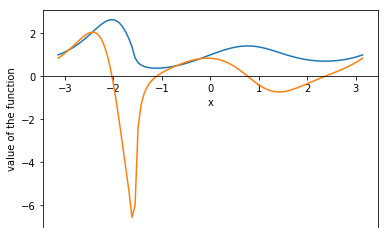

In [6]:
#plot the function 
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.plot(x_vec, f(x_vec))
plt.plot(x_vec, fprime(x_vec))
plt.xlabel("x")
plt.ylabel("value of the function")

#### Problem 2

In [7]:
#define functions of finite difference quotients

def for_diff1(fn, x, h):
    quotient = (fn(x+h)-fn(x))/h 
    return quotient

def for_diff2(fn, x, h):
    quotient = (-3*fn(x)+4*fn(x+h)-f(x+2*h))/(2*h)
    return quotient

def back_diff1(fn, x, h):
    quotient = (fn(x)-fn(x-h))/h
    return quotient
            
def back_diff2(fn, x, h):
    quotient = (-3*fn(x)+4*fn(x+h)-f(x+2*h))/(2*h)
    return quotient

def cen_diff1(fn, x, h):
    quotient =  (fn(x+h)-fn(x-h))/(2*h)
    return quotient

def cen_diff2(fn, x, h):
    quotient =  (fn(x-2*h)-8*fn(x-h)+8*fn(x+h)-fn(x+2*h))/(12*h) 
    return quotient

Text(0, 0.5, 'value of functions')

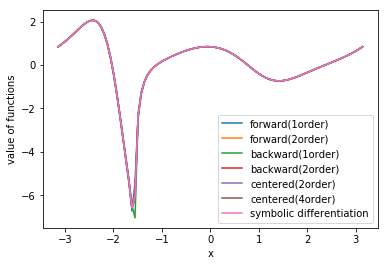

In [8]:
#plot the functions 
plt.plot(x_vec, for_diff1(f, x_vec, 0.01), label = "forward(1order)")
plt.plot(x_vec, for_diff2(f, x_vec, 0.01), label = "forward(2order)")
plt.plot(x_vec, back_diff1(f, x_vec, 0.01), label = "backward(1order)")
plt.plot(x_vec, back_diff2(f, x_vec, 0.01), label = "backward(2order)")
plt.plot(x_vec, cen_diff1(f, x_vec, 0.01), label = "centered(2order)")
plt.plot(x_vec, cen_diff2(f, x_vec, 0.01), label = "centered(4order)")

plt.plot(x_vec, fprime(x_vec), label = "symbolic differentiation")

plt.legend()
plt.xlabel("x")
plt.ylabel("value of functions")

From the above plots, we can see that the result of symbolic differentiation and the result of numerical differentiation are very similar.

#### Problem 3

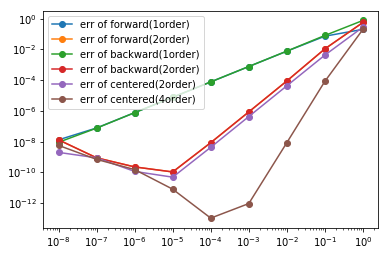

In [9]:
#Write a function that accepts a point x0 at which to compute the derivative--The function is same as fprime in problem one.

#compute the exact value of f_prime at point x0
x0 = 1
f_prime = fprime(x0)

#get the approximate derivatives
h_vec=np.logspace(-8, 0, 9)
app_deri1 = for_diff1(f, x0, h_vec)
app_deri2 = for_diff2(f, x0, h_vec) 
app_deri3 = back_diff1(f, x0, h_vec)
app_deri4 = back_diff2(f, x0, h_vec)
app_deri5 = cen_diff1(f, x0, h_vec)
app_deri6 = cen_diff2(f, x0, h_vec) 

#track the absolute error
abs_error1 = abs(app_deri1 - f_prime)
abs_error2 = abs(app_deri2 - f_prime)
abs_error3 = abs(app_deri3 - f_prime)
abs_error4 = abs(app_deri4 - f_prime)
abs_error5 = abs(app_deri5 - f_prime)
abs_error6 = abs(app_deri6 - f_prime)

#plot the absolute error against h

plt.plot(h_vec, abs_error1, marker = 'o', label='err of forward(1order)')
plt.plot(h_vec, abs_error2, marker = 'o', label='err of forward(2order)')
plt.plot(h_vec, abs_error3, marker = 'o', label='err of backward(1order)')
plt.plot(h_vec, abs_error4, marker = 'o', label='err of backward(2order)')
plt.plot(h_vec, abs_error5, marker = 'o',  label='err of centered(2order)')
plt.plot(h_vec, abs_error6, marker = 'o', label='err of centered(4order)')
plt.loglog()
plt.legend()

#### Problem 4

In [10]:
#Load the data 
radar_data = np.load("plane.npy")
radar_df = pd.DataFrame(radar_data, columns=['t','alpha','beta'])

In [11]:
#Convert degrees to radians
radar_df['alpha']=np.deg2rad(radar_df['alpha'])
radar_df['beta']=np.deg2rad(radar_df['beta'])

In [12]:
# Calculate the Cartesian coordinates of the plane
a = 500
radar_df["x"] = (a*np.tan(radar_df['beta'])) / (np.tan(radar_df['beta'])-np.tan(radar_df['alpha']))
radar_df["y"] = (a*np.tan(radar_df['beta']) * np.tan(radar_df['alpha'])) / (np.tan(radar_df['beta'])-np.tan(radar_df['alpha']))

In [13]:
warnings.filterwarnings("ignore")

#Approxiamate x_prime and y_prime
radar_df["x_prime"]= None
radar_df["y_prime"]= None

# Use forward difference quotient1 for t = 7
radar_df["x_prime"][0] = radar_df["x"][1]-radar_df["x"][0]
radar_df["y_prime"][0] = radar_df["y"][1]-radar_df["y"][0]

#Use backward difference quotient1 for t = 14
radar_df["x_prime"][7] = radar_df["x"][7]-radar_df["x"][6]
radar_df["y_prime"][7] = radar_df["y"][7]-radar_df["y"][6]

# Use centered difference quotient1 for t = 8, 9, . . . , 13
for i in range(1, 7):
    radar_df["x_prime"][i] = (radar_df["x"][i + 1]-radar_df["x"][i - 1])/2
    radar_df["y_prime"][i] = (radar_df["y"][i + 1]-radar_df["y"][i - 1])/2

#Calculate the values of the speed
radar_df['speed']=(radar_df["x_prime"]**2+radar_df["y_prime"]**2)**0.5

radar_df

,t,alpha,beta,x,y,x_prime,y_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44.6651,12.6583,46.4242
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45.3235,12.4449,47.001
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47.2803,12.8631,48.9988
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48.361,13.0832,50.0994
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46.651,12.4758,48.2904
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49.7005,13.7391,51.5646
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51.8986,14.6367,53.923
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49.5547,14.075,51.5148


In [14]:
for i in range(8):
    print("when t is {}, speed is {}".format(int(radar_df["t"][i]),  radar_df["speed"][i]))

when t is 7, speed is 46.42420062213374
when t is 8, speed is 47.001039380953344
when t is 9, speed is 48.99880514036797
when t is 10, speed is 50.09944162965227
when t is 11, speed is 48.290350838204944
when t is 12, speed is 51.564559049272255
when t is 13, speed is 53.923033545053535
when t is 14, speed is 51.51480056963696


#### Problem 5

In [15]:
#Define a function that approximate the Jacobian matrix of f at x using the second order centered difference quotient
def Jacobian(fn_vec, x_vec, h):
    m = len(fn_vec)
    n = len(x_vec) 
    I = np.identity(n)
    Jac = np.zeros((m, n))
    if n == 1:
        for i, fn in enumerate(fn_vec):
            for j in range(n):
                f= sy.lambdify([x1], fn, 'numpy')
                new_x_vec1 = x_vec+h*I[:,j]
                new_x_vec2 = x_vec-h*I[:,j]
                Jac[i,j] = (f(new_x_vec1[0]) - f(new_x_vec2[0]))/(2*h)        
    if n == 2:    
        for i, fn in enumerate(fn_vec):
            for j in range(n):
                f= sy.lambdify([x1,x2], fn, 'numpy')
                new_x_vec1 = x_vec+h*I[:,j]
                new_x_vec2 = x_vec-h*I[:,j]
                Jac[i,j] = (f(new_x_vec1[0], new_x_vec1[1]) - f(new_x_vec2[0], new_x_vec2[1]))/(2*h)
    if n == 3:
        for i, fn in enumerate(fn_vec):
            for j in range(n):
                f= sy.lambdify([x1,x2,x3], fn, 'numpy')
                new_x_vec1 = x_vec+h*I[:,j]
                new_x_vec2 = x_vec-h*I[:,j]
                Jac[i,j] = (f(new_x_vec1[0], new_x_vec1[1], new_x_vec1[2]) - f(new_x_vec2[0], new_x_vec2[1], new_x_vec2[2]))/(2*h)
            
    return Jac

In [16]:
#Test the function
# f(x1,x2) = [x1**2, x1**3 -x2]
x1 = sy.symbols("x1")
x2 = sy.symbols("x2")
fn1=x1**2
fn2=x1**3 - x2    
fn_vec = [fn1, fn2]
x_vec = [1, 2]
h = 0.01
Jacobian(fn_vec, x_vec, h)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

#### Problem7

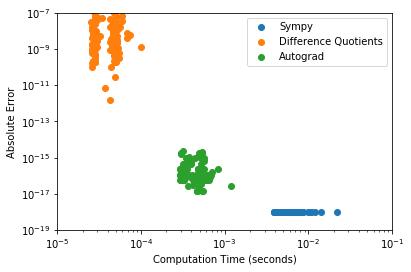

In [17]:

def Time(N): 
        t1 = np.zeros(N,dtype='float')
        t2 = np.zeros(N,dtype='float')
        t3 = np.zeros(N,dtype='float')
        abs_e1 = np.array([1e-18] * N)
        abs_e2 = np.zeros(N,dtype='float')
        abs_e3 = np.zeros(N,dtype='float')
        
        
        
        y = lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x))) 
        auto_yprime = grad(y)
        
        for i in range(N):
            x = np.random.uniform(-math.pi, math.pi)
            
            time1 = time.clock()
            z =sy.symbols('z')
        
            yprime = sy.diff((sy.sin(z)+1)**sy.sin(sy.cos(z)), z)
            fprime = sy.lambdify(z, yprime, "numpy")
            
            prime = fprime(x)
            time2 = time.clock()
            t1[i] = time2 - time1
            
            time3 = time.clock()
            appr_prime = cen_diff2(f, x, h = 0.01)
            time4 = time.clock()
            t2[i] = time4 - time3
            abs_e2[i] = abs(appr_prime - prime)
            
            time5 = time.clock()
            auto_appr_prime = auto_yprime(x)
            time6 = time.clock()
            t3[i] = time6 - time5
            abs_e3[i] = abs(auto_appr_prime- prime)
            
        return t1, t2, t3, abs_e1, abs_e2, abs_e3
    
t1, t2, t3, abs_e1, abs_e2, abs_e3 = Time(200)

plt.scatter(t1, abs_e1, label='Sympy') 
plt.scatter(t2 ,abs_e2, label='Difference Quotients') 
plt.scatter(t3, abs_e3, label='Autograd')
plt.loglog()
plt.xlim(10**-5,10**-1)
plt.ylim(10**-19,10**-7)
plt.xlabel("Computation Time (seconds)")
plt.ylabel("Absolute Error")
plt.legend()